In [ ]:
# change to the root directory of the project
import os
if os.getcwd().split("/")[-1] == "examples":
    os.chdir('..')
    
# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2    

In [3]:
try:
    import matplotlib.pyplot as plt
except ImportError:
    import sys
    !{sys.executable} -m pip install matplotlib
    import matplotlib.pyplot as plt
    
import numpy as np

from neurolib.models.aln import ALNModel
from neurolib.utils.parameterSpace import ParameterSpace
from neurolib.optimize.exploration import BoxSearch

# a nice color map
plt.rcParams['image.cmap'] = 'plasma'

In [ ]:
aln = ALNModel()

In [ ]:
parameters = ParameterSpace({"mue_ext_mean": np.linspace(0, 3, 2), "mui_ext_mean": np.linspace(0, 3, 2)})
# info: chose np.linspace(0, 3, 21) or more, values here are low for testing
search = BoxSearch(aln, parameters, filename="example-1.hdf")

In [ ]:
search.run()

In [ ]:
search.loadResults()

In [ ]:
print("Number of results: {}".format(len(search.results)))

In [12]:
# Example analysis of the results
# The .results attribute is a list and can be indexed by the run 
# number (which is also the index of the pandas dataframe .dfResults).
# Here we compute the maximum firing rate of the node in the last second
# and add the result (a float) to the pandas dataframe.
for i in search.dfResults.index:
    search.dfResults.loc[i, 'max_r'] = np.max(search.results[i]['rates_exc'][:, -int(1000/aln.params['dt']):])

Text(0, 0.5, 'Input to I')

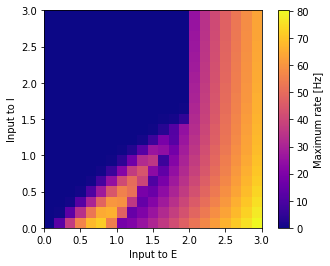

In [16]:
plt.imshow(search.dfResults.pivot_table(values='max_r', index = 'mui_ext_mean', columns='mue_ext_mean'), \
           extent = [min(search.dfResults.mue_ext_mean), max(search.dfResults.mue_ext_mean),
                     min(search.dfResults.mui_ext_mean), max(search.dfResults.mui_ext_mean)], origin='lower')
plt.colorbar(label='Maximum rate [Hz]')
plt.xlabel("Input to E")
plt.ylabel("Input to I")